In [1]:
import torch
from torch.autograd import Variable
import random
from matplotlib import pyplot as plt
import math

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 100, 2, 12, 1


In [2]:
# Check the version of torch.
!pip list | grep torch

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
torch (0.4.1)
torchtext (0.2.1)
torchvision (0.2.0)
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# Create random Tensors to hold inputs and outputs
x = torch.FloatTensor([[random.randint(-100,100), random.randint(-100,100)] for i in range(N)])
x.requires_grad=True
y = torch.FloatTensor([[(row[0] + row[1])] for row in x])
y.requires_grad=False

for i in range(5):
    print(x[i], " = ", y[i])

tensor([44., 43.], grad_fn=<SelectBackward>)  =  tensor([87.])
tensor([ 29., -68.], grad_fn=<SelectBackward>)  =  tensor([-39.])
tensor([94., 30.], grad_fn=<SelectBackward>)  =  tensor([124.])
tensor([23.,  6.], grad_fn=<SelectBackward>)  =  tensor([29.])
tensor([-72., -48.], grad_fn=<SelectBackward>)  =  tensor([-120.])


In [9]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

loss_list = []
learning_rate = 0.05

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    loss_list.append(math.log(loss.item()))
    # print(t, loss.item())

    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()
    
    optimizer.step()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
            

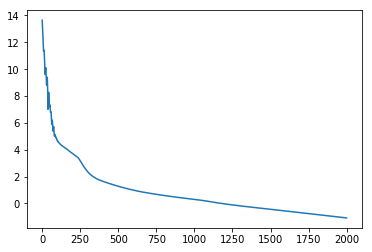

In [14]:
plt.plot(loss_list)

In [15]:
def neural_network_add(nn, a, b):
    result = nn(torch.FloatTensor([a, b]))
    return float(result[0])


# add two numbers using the model
neural_network_add(model, 200, 61.5)

261.526123046875

In [143]:
model

Sequential(
  (0): Linear(in_features=2, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)